In [79]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ydc.tools import import_data, distances
from ydc.tools.supercats import add_supercats
from simplekml import Kml, Style
from colorsys import hsv_to_rgb
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

In [2]:
businesses = import_data.import_businesses(status=True)
# reviews = import_data.import_reviews(status=True)

Successfully imported businesses with columns ['attributes' 'business_id' 'categories' 'city' 'full_address' 'hours'
 'latitude' 'longitude' 'name' 'neighborhoods' 'open' 'review_count'
 'stars' 'state' 'type']


In [3]:
(supercats_frame, names) = add_supercats(businesses)

In [63]:
super_cat_analysis = {}
sub_cat_analysis = {}
for super_cat in names.keys():
    this_super_cat = supercats_frame[supercats_frame['super_category'] == super_cat]
    super_cat_name = names[super_cat]['name']
    super_cat_analysis[super_cat_name] = {'mean': this_super_cat['stars'].mean(),
                                    'std': this_super_cat['stars'].std(),
                                    'var': this_super_cat['stars'].var(),
                                    'median': this_super_cat['stars'].median(),
                                    'count': this_super_cat['stars'].count(),
                                    'super_cat': super_cat}
    for sub_cat in names[super_cat]['sub_categories'].keys():
        this_sub_cat = this_super_cat[this_super_cat['sub_category'] == sub_cat]
        sub_cat_name = super_cat_name + "/" + names[super_cat]['sub_categories'][sub_cat]['name']
        sub_cat_analysis[sub_cat_name] = {'mean': this_sub_cat['stars'].mean(),
                                      'std': this_sub_cat['stars'].std(),
                                      'var': this_sub_cat['stars'].var(),
                                      'median': this_sub_cat['stars'].median(),
                                      'count': this_sub_cat['stars'].count(),
                                      'super_cat': super_cat,
                                      'sub_cat': sub_cat}

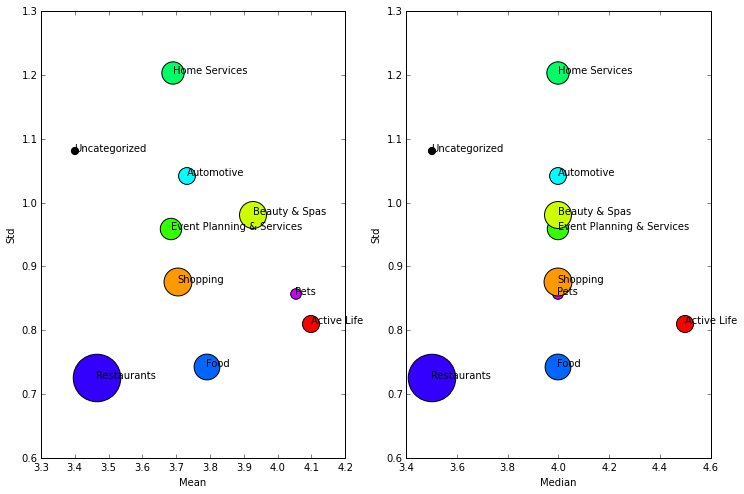

In [76]:
def get_color(super_cat, num):
    """ convert an supercat-integer  to (0.3, 0.2, 0.4)"""
    if super_cat==-1:
        return (0, 0, 0)
    rgb = hsv_to_rgb(super_cat/num, 1, 1)
    return (float(rgb[0]), float(rgb[1]), float(rgb[2]))

num = len(super_cat_analysis)
plt.subplot(121)
for cat, values in super_cat_analysis.items():
    plt.scatter(values['mean'], values['std'], c=get_color(values['super_cat'], num), s=values['count']/10)
    plt.text(values['mean'], values['std'], cat)
plt.xlabel('Mean')
plt.ylabel('Std')

plt.subplot(122)
for cat, values in super_cat_analysis.items():
    plt.scatter(values['median'], values['std'], c=get_color(values['super_cat'], num), s=values['count']/10)
    plt.text(values['median'], values['std'], cat)
plt.xlabel('Median')
plt.ylabel('Std')
plt.show()

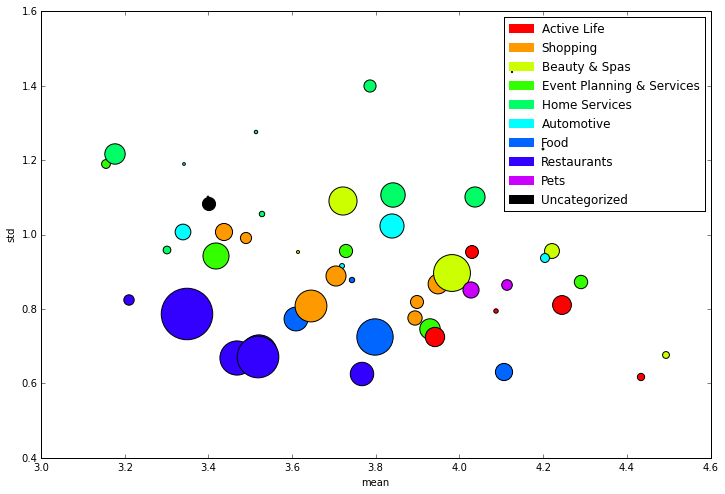

In [81]:
data = ['mean', 'std']

for cat, values in sub_cat_analysis.items():
    #if cat.find('Shopping'): 
    #    continue
    plt.scatter(values[data[0]], values[data[1]], c=get_color(values['super_cat'], num), s=values['count']/3)
    #plt.text(values[data[0]], values[data[1]], cat)
    
legend = []
for cat, value in names.items():
    legend.append(mpatches.Patch(color=get_color(cat, num), label=value['name']))
plt.legend(handles=legend)
plt.xlabel(data[0])
plt.ylabel(data[1])
plt.show()

In [67]:
super_analysis = pd.DataFrame(super_cat_analysis).transpose()
sub_analysis = pd.DataFrame(sub_cat_analysis).transpose()

In [68]:
sub_analysis.sort('mean', ascending=False)[:10]

,count,mean,median,std,sub_cat,super_cat,var
Beauty & Spas/Tattoo,140,4.492857,4.50,0.675857,3,2,0.456783
Active Life/Religious Organizations,158,4.433544,4.50,0.615884,3,0,0.379313
Event Planning & Services/Party & Event Planning,537,4.291434,4.50,0.873149,1,3,0.762389
Active Life/Fitness & Instruction,1062,4.245763,4.50,0.810718,0,0,0.657263
Beauty & Spas/Dentists,663,4.221719,4.50,0.956301,1,2,0.914512
Automotive/Auto Glass Services,241,4.203320,4.50,0.936610,3,5,0.877239
Event Planning & Services/Uncategorized,10,4.200000,4.50,1.229273,-1,3,1.511111
Pets/Uncategorized,4,4.125000,4.75,1.436141,-1,8,2.062500
Pets/Veterinarians,338,4.112426,4.50,0.863414,1,8,0.745483
Food/Specialty Food,887,4.106539,4.00,0.630026,2,6,0.396932
